<a href="https://colab.research.google.com/github/yukimiyazaki/AtCoder/blob/master/Colaboratory%E3%81%A7Atcoder%E3%81%AE%E3%82%B3%E3%83%BC%E3%83%89%E3%82%B0%E3%83%A9%E3%83%95%E3%82%92%E5%87%BA%E5%8A%9B%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ColaboratoryでAtcoderのコードグラフを出力してみた

参考

- 本家 http://pycallgraph.slowchop.com/en/master/
- 問題 https://atcoder.jp/contests/abc121/tasks/abc121_d
- code https://atcoder.jp/contests/abc121/submissions/4528834
- 日本語 https://postd.cc/profiling-in-python/



---
当初は下記の図のように実行時間を計算したかったのですが、どうやらgraphvizの都合でcolaboratory上では実行できなさそうです。もしわかる人がいたら教えてください(_ _)

http://pycallgraph.slowchop.com/en/master/examples/basic.html

# notebookでの使用法は下記

- https://github.com/osteele/callgraph/blob/master/examples/callgraph-decorator-examples.ipynb
- https://callgraph.readthedocs.io/en/latest/

In [1]:
!pip install graphviz
!pip install callgraph

In [0]:
from functools import lru_cache
import callgraph.decorator as callgraph

In [0]:
def xor(n):
  m = 0
  if n % 4 == 0:
    m = n
  elif n % 4 == 1:
    m = 1
  elif n % 4 == 2:
    m = n + 1
  return m

#mainの前にデコレータをつけた場合
@callgraph()
@lru_cache()
def main(A,B):
  a = xor(A-1)
  b = xor(B)
  return a ^ b #returnで出力を指定する

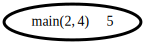

In [4]:
main(2,4) #計算すると
main.__callgraph__ #描画される

複数のfunctionを描画したいときは*graph collector*を使用する

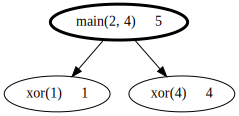

In [5]:
from callgraph import CallGraphRecorder

recorder = CallGraphRecorder()

@callgraph(recorder=recorder)
@lru_cache()
def xor(n):
  m = 0
  if n % 4 == 0:
    m = n
  elif n % 4 == 1:
    m = 1
  elif n % 4 == 2:
    m = n + 1
  return m

@callgraph(recorder=recorder)
@lru_cache()
def main(A,B):
  a = xor(A-1)
  b = xor(B)
  return a ^ b
  
main(2,4) #計算すると
recorder.graph #recorderを使って描画する